In [1]:
import pandas as pd
import pyreadr 
import matplotlib.pyplot as plt
import matplotlib.lines as lines

In [2]:
# Read in data
d = pd.read_csv('../mats/raw_data.csv', index_col=0)
# d = pyreadr.read_r('./raw_data.rds')[None]
d.describe()

,sex,mDEP01_9.6y,mDEP02_9.6y,mDEP03_9.6y,mDEP04_9.6y,mDEP05_9.6y,mDEP06_9.6y,mDEP07_9.6y,mDEP08_9.6y,mDEP09_9.6y,...,glucose_24.5y,CRP_24.5y,alcohol_24.5y,smoking_24.5y,canabis_24.5y,CMR_age_24.5y,BMI_24.5y,FMI_24.5y,TFI_24.5y,LMI_24.5y
count,15039.000000,8073.000000,8060.000000,8067.000000,8062.000000,8053.000000,8059.000000,8062.000000,8058.000000,8053.000000,...,3254.000000,3016.000000,4151.000000,1179.000000,1165.000000,4020.000000,3974.000000,3852.000000,3852.000000,3852.000000
mean,1.488596,0.602007,0.154094,0.234164,0.323989,0.144294,0.133143,0.215207,0.077811,0.060226,...,5.296884,2.282152,6.997591,29.067854,0.299571,24.484100,24.901685,8.071106,3.873719,15.936085
std,0.499887,0.596514,0.396131,0.466410,0.526407,0.388664,0.373172,0.452373,0.294379,0.256023,...,0.678985,6.516730,4.878227,39.154417,0.898858,0.814934,5.012065,3.865213,2.170947,2.180315
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.530000,0.100000,0.000000,0.000000,0.000000,22.416667,13.677715,0.627744,0.170635,0.787836
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.940000,0.390000,4.000000,0.000000,0.000000,23.916667,21.501419,5.422186,2.372966,14.338614
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.250000,0.850000,6.000000,10.000000,0.000000,24.500000,23.791556,7.158595,3.339170,15.642569
75%,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.587500,2.250000,10.000000,50.000000,0.000000,25.083333,27.026740,9.732571,4.764498,17.258614
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,22.150000,224.720000,40.000000,300.000000,6.000000,26.500000,54.166069,28.491934,16.692992,26.601813


In [3]:
df = d[list(d.columns[d.columns.str.contains('age')])].describe()

In [4]:
# t = d[list(d.columns[~(d.columns.str.contains('DEP|age'))])]
# s = ['_'.join(x.split('_')[:-1]) for x in t.columns]
# set(s)

cmr_labels = {'height':'Height',
              'weight':'Weight',
              'BMI':'Body mass index',
              'waist_circ':'Waist circumference',
              'waist_hip_ratio':'Waist/hip ratio',
              'total_fatmass':'Total fat mass',
              'total_leanmass':'Total lean mass',
              'trunk_fatmass':'Trunk fat mass',
              'android_fatmass':'Android fat mass',
              'liver_fat':'Liver fat',
              'SBP':'Systolic blood pressure',
              'DBP':'Diastolic blood pressure',
              'PWV':'Pulse wave velocity',
              'IMT':'Intima-media thickness',
              'heart_rate':'Heart rate',
              'LVM':'Left ventricular mass',
              'RWT':'Relative wall thickness',
              'FS':'Fractional shortening',
              'tot_chol':'Total cholesterol',
              'HDL_chol':'HDL-cholesterol',
              'LDL_chol':'LDL-cholesterol',
              'insulin':'Insulin',
              'triglyc':'Triglycerides',
              'glucose':'Glucose',
              'CRP':'C-reactive protein',
              'IL_6':'Interleaukin-6'}

dep_names = ['Felt miserable or unhappy',
             'Didn\'t enjoy anything at all',
             'Felt so tired they just sat around and did nothing',
             'Was very restless',
             'Felt they were no good any more',
             'Cried a lot',
             'Found it hard to think properly or concentrate',
             'Hated themselves',
             'Felt they were a bad person',
             'Felt lonely',
             'Thought nobody really loved them',
             'Thought they would never be as good as other people',
             'Felt they did everything wrong']

In [5]:
dep = df[list(df.columns[df.columns.str.contains('DEP')])]
cmr = df[list(df.columns[df.columns.str.contains('CMR')])]

In [6]:
def cmr_meas(age):
    t = d[list(d.columns[d.columns.str.contains(age) & ~(d.columns.str.contains('DEP|age'))])]
    s = [x.split('_'+age)[0] for x in t.columns]
    return(s)
def dep_meas(age):
    t = d[list(d.columns[d.columns.str.contains(age) & d.columns.str.contains('DEP') & ~(d.columns.str.contains('score|age'))])]
    s = [x.split('_'+age)[0][1:] for x in t.columns]
    return(s)
def get_age(list_ages): 
    return( cmr.loc['50%', cmr.columns.str.contains('|'.join(list_ages))])

### Figure 1

/var/folders/f9/fknlq25n23l74zmhg8zbckx80000gn/T/ipykernel_22457/3860880031.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(names, fontsize=15)
/var/folders/f9/fknlq25n23l74zmhg8zbckx80000gn/T/ipykernel_22457/3860880031.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(names, fontsize=15)


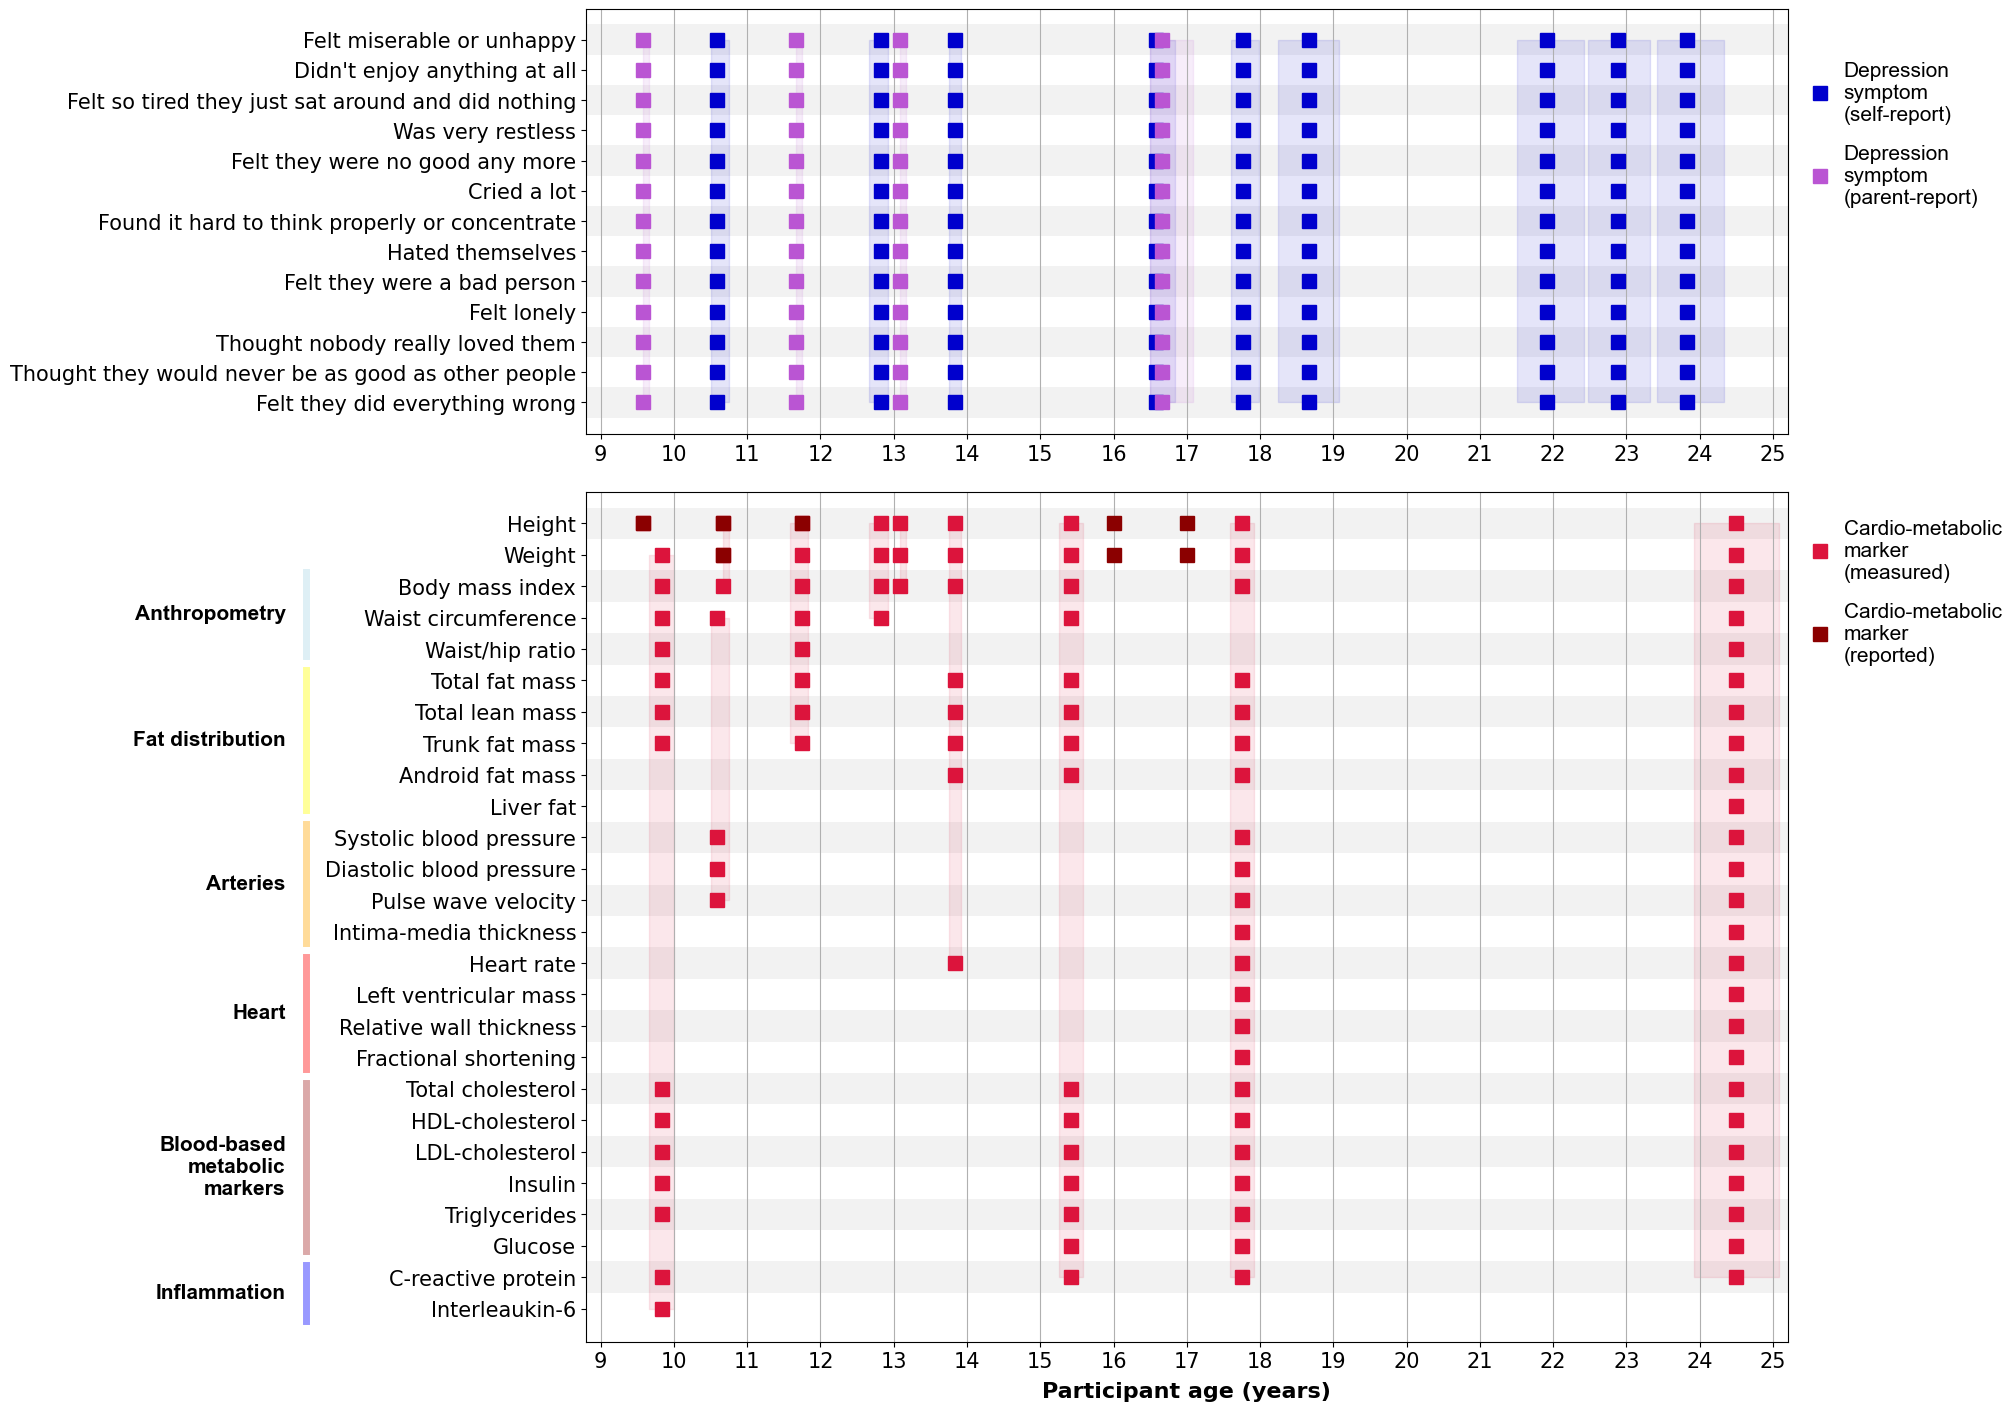

In [7]:
fig, axs = plt.subplot_mosaic('Ax;Bx', figsize=(20,14), width_ratios=[10,1],
                              height_ratios=[len(dep_names),len(cmr_labels)], layout='constrained')

plt.rcParams["font.family"] = "Arial"

def plot_age(ax, dset_name):
    if dset_name=='dep': 
        label_order = ['DEP'+str(x).zfill(2) for x in range(1,14)]
    else:
        label_order = cmr_labels.keys()
    
    # Set up order of labels 
    ax.plot([9.55]*len(label_order), label_order, ' ', ms=1)
    # Add background grid 
    ax.xaxis.grid(True)
    for y in [i-0.5 for i in range(0, len(label_order), 2)]:
        ax.axhspan(y, y+1, facecolor='grey', alpha=0.1)
    
    dset = globals()[dset_name]
    
    for c in dset.columns:
        age = str(round(dset.loc['50%',c],1))
        if dset_name=='dep': 
            lbls = [x for x in label_order if x in dep_meas(age)]
            col = 'mediumblue'if 'sDEP' in c else 'mediumorchid'
            names = dep_names
        else:
            lbls = [x for x in cmr_labels if x in cmr_meas(age)]
            col = 'crimson'; names = list(cmr_labels.values())
        # Plot median age
        ax.plot([dset.loc['50%',c]]*len(lbls), lbls, 's', ms=10, color=col)
        # Plot interquartile range 
        ax.fill_betweenx(lbls, dset.loc['25%',c], dset.loc['75%',c], color=col, alpha=0.1)
    
    # Add self-reported height and weight 
    if dset_name=='cmr': 
        ax.plot(get_age(['9.6','10.7','11.8','16y','17y']), ['height']*5, 's', ms=10, color='darkred')
        ax.plot(get_age(['10.7','16y','17y']), ['weight']*3, 's', ms=10, color='darkred')
    
    # Adjust ranges 
    ax.set(xlim=(8.8,25.2),ylim=(-1,len(label_order)+0.05))
    # Set x axis ticks every 1 year 
    ax.set_xticks(range(9,26)); ax.set_xticklabels(range(9,26), fontsize=15)
    if dset_name=='cmr': ax.set_xlabel('Participant age (years)', fontsize=16, fontweight='bold', labelpad=7)
    # Add readable y labels
    ax.set_yticklabels(names, fontsize=15)
    # Order axis
    ax.invert_yaxis()
    
plot_age(axs['A'], 'dep')
plot_age(axs['B'], 'cmr')

# Add legend -----------------------------------------------------------------------
labs = ['Depression\nsymptom\n(self-report)','Depression\nsymptom\n(parent-report)',
        'Cardio-metabolic\nmarker\n(measured)','Cardio-metabolic\nmarker\n(reported)']
for i, c in enumerate(['mediumblue','mediumorchid','crimson','darkred']):
    p = i if i<2 else i+3.5
    axs['x'].plot(1, p, 's', ms=10, color=c)
    axs['x'].text(3, p, labs[i], fontsize=15, va='center')
    
axs['x'].set_axis_off()
axs['x'].set(xlim=(0,10),ylim=[-1,15])
axs['x'].invert_yaxis()

def markcmr(end,start, col, label):
    fig.add_artist(lines.Line2D([.15]*2, [start,end],  lw=5., color=col, alpha=0.4))
    fig.text(.14, (end+start)/2, label, ha='right',va='center', fontsize=15, fontweight='bold')
    
markcmr(.595,.535, 'lightblue','Anthropometry')
markcmr(.525,.425, 'yellow','Fat distribution')
markcmr(.415,.330, 'orange','Arteries')
markcmr(.320,.240, 'red',  'Heart')
markcmr(.230,.110, 'brown','Blood-based\nmetabolic\nmarkers')
markcmr(.100,.060, 'blue','Inflammation')


fig.savefig('assets/timeline.pdf', dpi=400)
fig.savefig('assets/timeline.png', dpi=70, bbox_inches='tight')

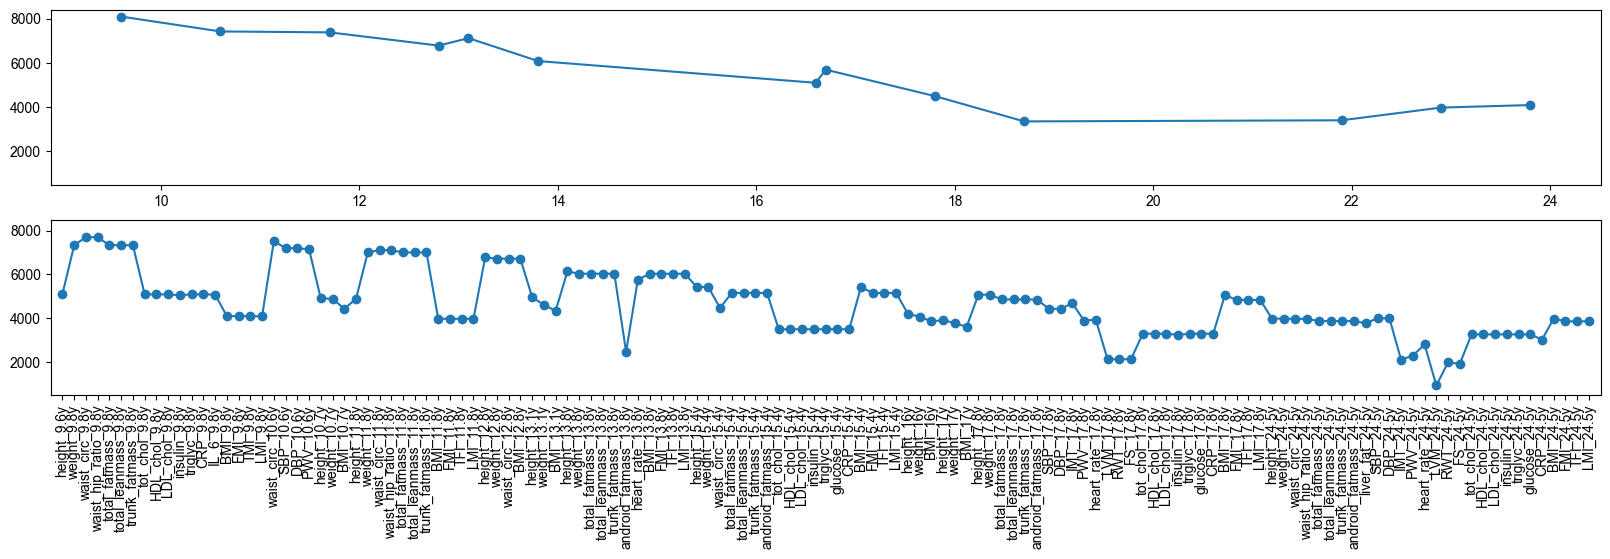

In [8]:
fig, axs = plt.subplot_mosaic('A;B', figsize=(20,5))

dep = d[list(d.columns[d.columns.str.contains('DEP_score')])]
cmr = d[list(d.columns[~d.columns.str.contains('DEP|sex|age|smoking|canabis|alcohol')])]

axs['A'].plot([9.6,10.6,11.7,12.8,13.1,13.8,16.6,16.7,17.8,18.7,21.9,22.9,23.8],dep.describe().loc['count'], '-o')
axs['B'].plot(cmr.describe().loc['count'], '-o')

axs['B'].tick_params(axis='x', labelrotation = 90)
axs['B'].set_xlim(-1,cmr.shape[1]-1);

axs['A'].set_ylim(500, 8400);axs['B'].set_ylim(500, 8500);

fig.savefig('assets/samplesizes.pdf', dpi=400)
fig.savefig('assets/samplesizes.png', dpi=70, bbox_inches='tight')

In [9]:
cs = d.describe().loc['count'].sort_values()

In [10]:
cs.tail(30)

sDEP05_10.6y             7412.0
sDEP03_10.6y             7412.0
sDEP06_10.6y             7412.0
sDEP12_10.6y             7412.0
sDEP07_10.6y             7413.0
sDEP02_10.6y             7414.0
sDEP_score_10.6y         7416.0
mDEP_age_11.7y           7478.0
waist_circ_10.6y         7517.0
sDEP_age_10.6y           7557.0
CMR_age_10.6y            7557.0
waist_hip_ratio_9.8y     7694.0
waist_circ_9.8y          7698.0
CMR_age_9.8y             7722.0
mDEP13_9.6y              8045.0
mDEP10_9.6y              8046.0
mDEP11_9.6y              8050.0
mDEP09_9.6y              8053.0
mDEP05_9.6y              8053.0
mDEP12_9.6y              8056.0
mDEP08_9.6y              8058.0
mDEP06_9.6y              8059.0
mDEP02_9.6y              8060.0
mDEP07_9.6y              8062.0
mDEP04_9.6y              8062.0
mDEP03_9.6y              8067.0
mDEP01_9.6y              8073.0
mDEP_score_9.6y          8087.0
mDEP_age_9.6y            8221.0
sex                     15039.0
Name: count, dtype: float64